In [3]:
# importar libreria para cargar y analizar datos del dataset
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
import seaborn as sns

In [4]:
import pandas as pd
dataset = "3.DatasetBanco.csv"
#Cargar el dataset en la variable df.
dfOriginal = pd.read_csv(dataset, sep=";")
dataframe=dfOriginal
dataframe.head()

,DNI,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,AVALUOVIVIENDA,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,104600001,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,A201,1
1,104600002,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,A201,2
2,104600003,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,A201,1
3,104600004,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,A201,1
4,104600005,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,A201,2


In [5]:
salida = dfOriginal.TIPOCLIENTE.values

print(dataframe.shape)
dataframe=dataframe.drop(['DNI'], axis=1)
dataframe=dataframe.drop(['TIPOCLIENTE'], axis=1)
print(dataframe.shape)
dataframe.head()

(1000, 18)
(1000, 16)


,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,AVALUOVIVIENDA,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,TRABAJADOREXTRANJERO
0,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,A201
1,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,A201
2,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,A201
3,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,A201
4,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,A201


In [6]:
categorical_ordinal = ['HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOEMPLEO','ESTADOCIVILYSEXO','ACTIVOS','VIVIENDA','EMPLEO']
categorical_nominal = ['PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO']
numerical = ['PLAZOMESESCREDITO','MONTOCREDITO','TASAPAGO','AVALUOVIVIENDA','EDAD','CANTIDADCREDITOSEXISTENTES']
preprocesador1 = make_column_transformer(
    (OrdinalEncoder(),categorical_ordinal),
    (OneHotEncoder(sparse=False),categorical_nominal),
    remainder='passthrough'
    )

X = preprocesador1.fit_transform(dataframe)
print(X.shape[1])
print(X.shape)

print(salida.shape)

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

#print(preprocesador1)

cnamesDataset1 = categorical_ordinal
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_nominal)
cnamesDataset3 = numerical
#print(cnamesDataset2)

cnamesDataset1.extend(cnamesDataset2)
cnamesDataset1.extend(cnamesDataset3)
print(cnamesDataset1)

DataframePreprocesado = pd.DataFrame(data=X,columns=cnamesDataset1)
DataframePreprocesado = pd.concat([DataframePreprocesado, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframePreprocesado.to_csv("4.DatasetBancoPreprocesado.csv", sep=";",index = False) #sep es el separador, por defector es ","
DataframePreprocesado.head()

28
(1000, 28)
(1000,)
['HISTORIALCREDITO', 'SALDOCUENTAAHORROS', 'TIEMPOEMPLEO', 'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA', 'EMPLEO', 'PROPOSITOCREDITO_A40', 'PROPOSITOCREDITO_A41', 'PROPOSITOCREDITO_A410', 'PROPOSITOCREDITO_A42', 'PROPOSITOCREDITO_A43', 'PROPOSITOCREDITO_A44', 'PROPOSITOCREDITO_A45', 'PROPOSITOCREDITO_A46', 'PROPOSITOCREDITO_A48', 'PROPOSITOCREDITO_A49', 'GARANTE_A101', 'GARANTE_A102', 'GARANTE_A103', 'TRABAJADOREXTRANJERO_A201', 'TRABAJADOREXTRANJERO_A202', 'PLAZOMESESCREDITO', 'MONTOCREDITO', 'TASAPAGO', 'AVALUOVIVIENDA', 'EDAD', 'CANTIDADCREDITOSEXISTENTES']


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,4.0,4.0,4.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,6.0,1169.0,4.0,4.0,67.0,2.0,1
1,2.0,0.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,48.0,5951.0,2.0,2.0,22.0,1.0,2
2,4.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,12.0,2096.0,2.0,3.0,49.0,1.0,1
3,2.0,0.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,...,1.0,1.0,0.0,42.0,7882.0,2.0,4.0,45.0,1.0,1
4,3.0,0.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,24.0,4870.0,3.0,4.0,53.0,2.0,2


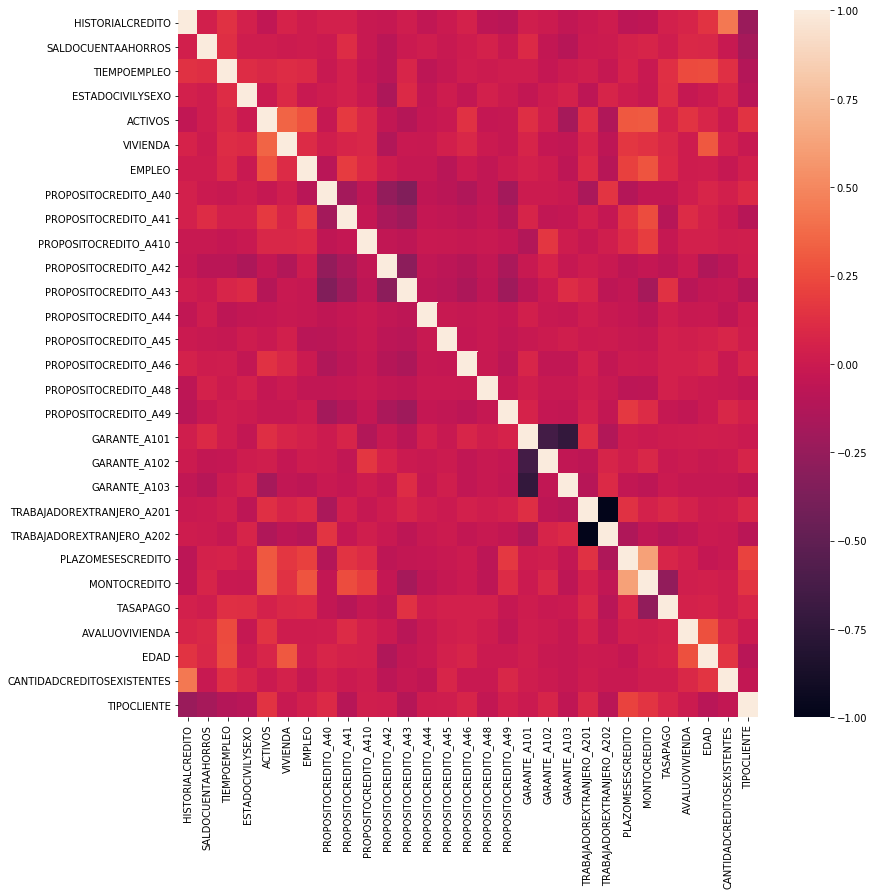

In [7]:

#Análisis de correlaciones entre variables
cr=DataframePreprocesado.corr()
plt.figure(figsize=(13, 13))
ax = sns.heatmap(cr)
plt.savefig('attribute_correlations.png', tight_layout=True)

In [8]:
cr=round(cr,3)
cr

,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
HISTORIALCREDITO,1.000,0.039,0.138,0.042,-0.054,0.062,0.010,0.042,0.039,-0.022,...,-0.047,-0.014,0.014,-0.077,-0.060,0.044,0.063,0.147,0.437,-0.229
SALDOCUENTAAHORROS,0.039,1.000,0.121,0.017,0.019,0.007,0.012,-0.002,0.113,-0.019,...,-0.095,-0.007,0.007,0.048,0.065,0.022,0.091,0.084,-0.022,-0.179
TIEMPOEMPLEO,0.138,0.121,1.000,0.111,0.087,0.111,0.101,-0.021,0.039,-0.035,...,0.008,0.027,-0.027,0.057,-0.008,0.126,0.245,0.256,0.126,-0.116
ESTADOCIVILYSEXO,0.042,0.017,0.111,1.000,-0.007,0.100,-0.012,0.015,0.041,-0.015,...,0.048,-0.066,0.066,0.015,-0.016,0.119,-0.027,0.008,0.065,-0.088
ACTIVOS,-0.054,0.019,0.087,-0.007,1.000,0.345,0.276,-0.024,0.173,0.085,...,-0.179,0.132,-0.132,0.304,0.312,0.053,0.147,0.073,-0.008,0.143
VIVIENDA,0.062,0.007,0.111,0.100,0.345,1.000,0.107,0.025,0.064,0.084,...,-0.054,0.064,-0.064,0.157,0.136,0.089,0.012,0.301,0.049,-0.019
EMPLEO,0.010,0.012,0.101,-0.012,0.276,0.107,1.000,-0.089,0.181,0.101,...,-0.069,0.101,-0.101,0.211,0.285,0.098,0.013,0.016,-0.026,0.033
PROPOSITOCREDITO_A40,0.042,-0.002,-0.021,0.015,-0.024,0.025,-0.089,1.000,-0.187,-0.061,...,-0.012,-0.154,0.154,-0.110,-0.041,-0.046,0.020,0.075,0.036,0.097
PROPOSITOCREDITO_A41,0.039,0.113,0.039,0.041,0.173,0.064,0.181,-0.187,1.000,-0.037,...,-0.035,0.032,-0.032,0.145,0.252,-0.095,0.107,0.051,-0.005,-0.100
PROPOSITOCREDITO_A410,-0.022,-0.019,-0.035,-0.015,0.085,0.084,0.101,-0.061,-0.037,1.000,...,0.016,-0.027,0.027,0.105,0.193,-0.030,0.040,0.042,0.018,0.028


In [9]:
#Análisis descriptivo
DataframePreprocesado.describe()


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.54500,1.105000,2.384000,1.68200,1.358000,0.929000,1.904000,0.234000,0.103000,0.01200,...,0.052000,0.963000,0.037000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.300000
std,1.08312,1.580023,1.208306,0.70808,1.050209,0.531264,0.653614,0.423584,0.304111,0.10894,...,0.222138,0.188856,0.188856,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.458487
min,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,2.00000,0.000000,2.000000,1.00000,0.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,2.00000,0.000000,2.000000,2.00000,1.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,4.00000,2.000000,4.000000,2.00000,2.000000,1.000000,2.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,2.000000
max,4.00000,4.000000,4.000000,3.00000,3.000000,2.000000,3.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


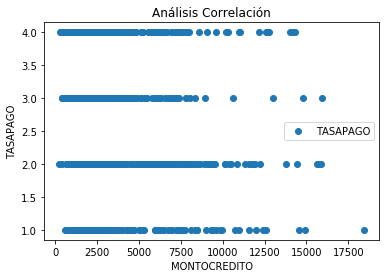

In [10]:
#Visualización para análisis
variableAnálisis='MONTOCREDITO'
variableSalida='TASAPAGO'
DataframePreprocesado.plot(x=variableAnálisis, y=variableSalida, style='o')  
plt.title('Análisis Correlación')  
plt.xlabel(variableAnálisis)  
plt.ylabel(variableSalida)  
plt.show()

In [11]:
from sklearn import preprocessing

# Min max scaling
DataframePreprocesado=DataframePreprocesado.drop(['TIPOCLIENTE'], axis=1)
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(DataframePreprocesado)
print("\nDatos normalizados con escala Min Max:\n", data_scaled_minmax)

DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax,columns=cnamesDataset1)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dfOriginal[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado1.to_csv("5.DatasetBancoTransformadoMinMax.csv", sep=";",index = False) #sep es el separado, por defector es ","
DataframeTransformado1.head()


Datos normalizados con escala Min Max:
 [[1 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [0 0 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]]


,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,PROPOSITOCREDITO_A410,...,GARANTE_A103,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,AVALUOVIVIENDA,EDAD,CANTIDADCREDITOSEXISTENTES,TIPOCLIENTE
0,1.00,1.0,1.00,0.666667,0.000000,0.5,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,1
1,0.50,0.0,0.50,0.333333,0.000000,0.5,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,2
2,1.00,0.0,0.75,0.666667,0.000000,0.5,0.333333,0.0,0.0,0.0,...,0.0,1.0,0.0,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1
3,0.50,0.0,0.75,0.666667,0.333333,1.0,0.666667,0.0,0.0,0.0,...,1.0,1.0,0.0,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1
4,0.75,0.0,0.50,0.666667,1.000000,1.0,0.666667,1.0,0.0,0.0,...,0.0,1.0,0.0,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,2


In [12]:
def predecir(Dni=0):
    cliente=dfOriginal.loc[dfOriginal['DNI'] == Dni]      
    tipoCliente=2
    if not(cliente.empty):
        print('Existe el cliente')
        indiceCliente=cliente.index.values[0]
        edad=cliente['EDAD'].values
        edad=edad[0]
        print('Indice: ',indiceCliente)
        cliente=DataframeTransformado1.loc[ indiceCliente , : ]
        historialCredito=round(cliente[0],2)
        saldoAhorros=round(cliente[1],2)
        tiempoEmpleo=round(cliente[2],2)
        activos=round(cliente[4],2)
        print('Historial de Crédito:',historialCredito, ' Saldo:',saldoAhorros, ' Tiempo de empleo:', tiempoEmpleo, ' Activos:',activos, ' Edad:',edad)
        if activos<0.5 and edad>25 and (historialCredito<0.5 or saldoAhorros>0.5 or tiempoEmpleo>0.5):
            tipoCliente=1
        else:
            tipoCliente=2
    else:
        tipoCliente=3
    return tipoCliente



Existe el cliente
Indice:  1
Historial de Crédito: 0.5  Saldo: 0.0  Tiempo de empleo: 0.5  Activos: 0.0  Edad: 22
2
Mal cliente


In [ ]:
Dni=int('104600002')
tipoCliente=predecir(Dni)
print(tipoCliente)
if tipoCliente==1:
    print('Buen cliente')
elif tipoCliente==2:
    print('Mal cliente')
else:
    print('No existe el cliente')